# **Import libraries**

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# **Load the dataset and split into features (X) and target (y)**

In [13]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names) # Store feature values in a DataFrame
y = data.target # Store target labels

# **Standardize the data**
Important for PCA since it is sensitive to scale differences.

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale all features to have mean=0 and variance=1

# **Determine the optimal number of principal components**

In [15]:
pca_full = PCA().fit(X_scaled)
explained_variance = np.cumsum(pca_full.explained_variance_ratio_)
optimal_components = np.argmax(explained_variance >= 0.95) + 1  # Select components covering 95% variance

In [17]:
optimal_components

2

# **Apply PCA with the optimal number of components**

In [18]:
pca = PCA(n_components=optimal_components)
X_pca = pca.fit_transform(X_scaled)

# **Visualize explained variance by each principal component**

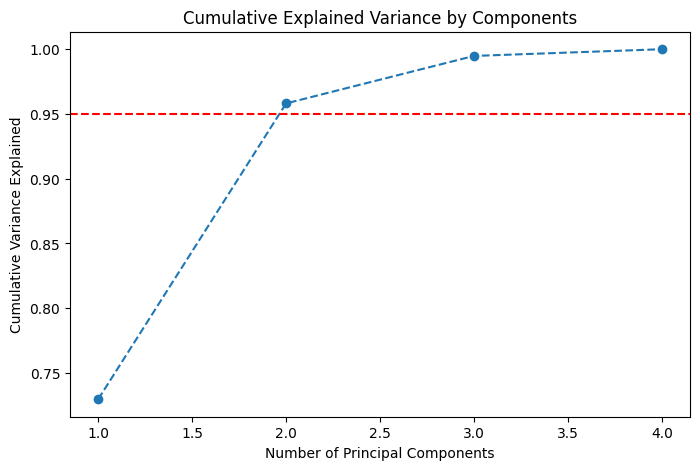

In [19]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca_full.explained_variance_ratio_)+1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Explained Variance by Components')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.show()

Convert PCA-transformed data into a DataFrame for visualization

In [20]:
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(optimal_components)])  # Store principal components
X_pca_df['target'] = y  # Add the target labels to the DataFrame

In [24]:
X_pca_df.head()

,PC1,PC2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


# **Scatter plot of first two PCA components to visualize clusters**

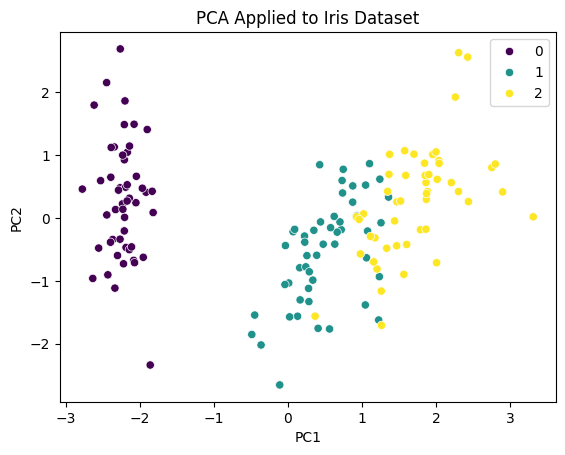

In [21]:
sns.scatterplot(x='PC1', y='PC2', hue=y, palette='viridis', data=X_pca_df)
plt.title('PCA Applied to Iris Dataset')
plt.show()

# **Split the original and PCA-transformed data into training and testing sets**

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# **Train a classifier without PCA (on the original dataset)**

In [26]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)  # Train the model on original features
y_pred = clf.predict(X_test)  # Predict on test set
accuracy_original = accuracy_score(y_test, y_pred)  # Compute accuracy
print(f'Accuracy without PCA: {accuracy_original:.4f}')

Accuracy without PCA: 1.0000


# **Train a classifier with PCA-transformed data**

In [27]:
clf_pca = RandomForestClassifier(random_state=42)
clf_pca.fit(X_train_pca, y_train)  # Train the model on PCA features
y_pred_pca = clf_pca.predict(X_test_pca)  # Predict on test set
accuracy_pca = accuracy_score(y_test, y_pred_pca)  # Compute accuracy
print(f'Accuracy with PCA: {accuracy_pca:.4f}')

Accuracy with PCA: 0.9000
